In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## for processing
import re
import nltk

In [3]:
df = pd.read_csv(r'soc_202311261432.csv')
df = df.fillna('N/A')
df.head()

,CASE_ID,SOC_CODE,SOC_TITLE,JOB_DUTIES
0,21291992,53-3032.00,Heavy and Tractor-Trailer Truck Drivers,Drive a tractor-trailer combination or a truck...
1,21293592,37-3013.00,Tree Trimmers and Pruners,Trims and/or removes trees by climbing with a...
2,21291654,37-3011.00,Landscaping and Groundskeeping Workers,Landscape or maintain grounds using hand or po...
3,21286051,49-9045.00,"Refractory Materials Repairers, Except Brickma...",Reline or repair interior of refractory vessel...
4,21295310,37-3011.00,Landscaping and Groundskeeping Workers,Landscape or maintain properties using tools o...


In [4]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    ## back to string from list
    text = " ".join(lst_text)
    return text

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords[0:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we']

In [7]:
df['text_clean'] = df['JOB_DUTIES'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

In [8]:
df.head()

,CASE_ID,SOC_CODE,SOC_TITLE,JOB_DUTIES,text_clean
0,21291992,53-3032.00,Heavy and Tractor-Trailer Truck Drivers,Drive a tractor-trailer combination or a truck...,drive tractortrailer combination truck capacit...
1,21293592,37-3013.00,Tree Trimmers and Pruners,Trims and/or removes trees by climbing with a...,trim andor remove tree climbing aid safety bel...
2,21291654,37-3011.00,Landscaping and Groundskeeping Workers,Landscape or maintain grounds using hand or po...,landscape maintain ground using hand power too...
3,21286051,49-9045.00,"Refractory Materials Repairers, Except Brickma...",Reline or repair interior of refractory vessel...,reline repair interior refractory vessel refra...
4,21295310,37-3011.00,Landscaping and Groundskeeping Workers,Landscape or maintain properties using tools o...,landscape maintain property using tool equipme...


In [9]:
# Split data into training and testing sets yet
X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], df['SOC_CODE'], test_size=0.2, random_state=42)

In [10]:
# Text vectorization using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [11]:
# Train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [12]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report_result)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

  11-1011.00       1.00      1.00      1.00         3
  11-1021.00       0.33      0.33      0.33         3
  11-2021.00       0.71      1.00      0.83         5
  11-2022.00       0.00      0.00      0.00         1
  11-3012.00       0.00      0.00      0.00         1
  11-3013.00       1.00      0.50      0.67         2
  11-3031.02       0.00      0.00      0.00         1
  11-3061.00       0.00      0.00      0.00         1
  11-3071.00       0.00      0.00      0.00         1
  11-3131.00       0.00      0.00      0.00         2
  11-9013.00       1.00      1.00      1.00         1
  11-9021.00       0.00      0.00      0.00         4
  11-9031.00       0.00      0.00      0.00         1
  11-9051.00       1.00      0.44      0.62         9
  11-9072.00       1.00      1.00      1.00         1
  11-9081.00       0.00      0.00      0.00         1
  11-9179.00       1.00      1.00      1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
import numpy as np

# text = "Reline or repair interior of refractory vessels with refractory clay and other refractory material. Chip slag from linings of ladles or remove linings when beyond repair, using hammers and chisels and other equipment. Mix specified amounts of sand, clay, mortar powder, and water to form refractory clay or mortar, using shovels or mixing machines. Tighten locknuts holding refractory stopper assemblies together, spread mortar on jackets to seal sleeve joints, and dry mortar. Remove worn or damaged block refractory linings of furnaces, kilns, and cyclones using hand tools and other equipment. Climb scaffolding, carrying hoses, and spray surfaces with refractory mixtures, using spray equipment. Construct and installation of refractory material laying by hand and spraying equipment. May perform other duties and tasks per SOC Code 49-9045."
# text = "perform variety attending duty traveling carnival set teardown operate amusement food concession oflc eta requested detail specific portion job duty food concession set tear mobile food concession typically mounted trailer supervisor would position trailer specific location ground unhitch power unit trailer awning covering window transit would raised secured item trash can screen table may positioned outside trailer carried inside trailer transit would manually moved inside trailer outside trailer would cleaned sanitized stocked supply event counter guidance railing signage decoration would positioned outside trailer condiment dispenser napkin dispenser trash container would set outside trailer typically fair event maintains table chair patron instance worker may set limited number chair table patron use teardown would simply duty handled reverse order item stored secured transit next location clarify portion job duty includes operate mobile food concession stand carnival midway mobile food concession stand limited selling one two specific item cotton candy popcorn turkey leg roasted corn specialty food food prepared production line individual may perform one task measuring corn oil popper next individual would salt bag next individual would choose correct bag per customer order hand teller next individual would taken order taken money made change hand order client"
text = "maintenance worker responsible responding attending guest request resolve maintenance issue perform daily check preventative maintenance tool equipment troubleshoot perform basic repair type equipment including plumbing electrical equipment"

text = utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords)

# Vectorize the new text using the same vectorizer
text_vectorized = vectorizer.transform([text])

# Make probability predictions on the test set
predicted_soc_code = classifier.predict_proba(text_vectorized)

# Get the top 5 predicted classes and their confidence scores for each instance
top5_predictions = np.argsort(-predicted_soc_code[0])[:10]

top5_labels = [classifier.classes_[idx] for idx in top5_predictions]
top5_scores = sorted(predicted_soc_code[0], reverse=True)[:10]

[{'label': label, 'score': score} for label, score in zip(top5_labels, top5_scores)]

[{'label': '49-9071.00', 'score': 1.0},
 {'label': '11-1011.00', 'score': 0.0},
 {'label': '49-3023.02', 'score': 0.0},
 {'label': '49-3023.01', 'score': 0.0},
 {'label': '49-3023.00', 'score': 0.0},
 {'label': '49-3022.00', 'score': 0.0},
 {'label': '49-3021.00', 'score': 0.0},
 {'label': '49-3011.00', 'score': 0.0},
 {'label': '49-2098.00', 'score': 0.0},
 {'label': '49-2096.00', 'score': 0.0}]

<Axes: >

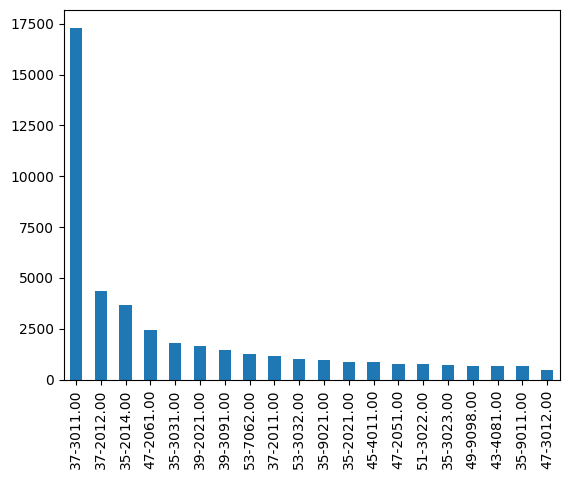

In [14]:
df['SOC_CODE'].value_counts()[0:20].plot(kind='bar')

In [48]:
import joblib

# Save the fitted vectorizer and model to a file
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(classifier, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [17]:
from sklearn.exceptions import InconsistentVersionWarning
import warnings
warnings.simplefilter("error", InconsistentVersionWarning)

try:
   est = joblib.load("tfidf_vectorizer.joblib")
except InconsistentVersionWarning as w:
   print(w.original_sklearn_version)

1.2.2
